In [ ]:
from pinard.model_selection import train_test_split_idx
import numpy as np
from os.path import abspath
from os.path import dirname as d

ROOT_DIR = './..'


def path_to(str):
    return ROOT_DIR + "/tests/data/" + str


def split_data():
    split_data = np.loadtxt(path_to("test_split.csv"), delimiter=";")
    y = np.reshape(split_data[:, 0], (-1, 1))
    x = split_data[:, 1:]
    return (x, y)


def split_validation_data():
    split_validation_data = np.loadtxt(
        path_to("test_split_validation.csv"), delimiter=";"
    )
    return split_validation_data.astype(int)


split_list = [
    ({"method": "random", "test_size": 0.25, "random_state": 42}, 0),
    (
        {
            "method": "k_mean",
            "test_size": 0.25,
            "random_state": 42,
            "metric": "canberra",
        },
        1,
    ),
    (
        {
            "pca_components": 4,
            "method": "k_mean",
            "test_size": 0.25,
            "random_state": 42,
            "metric": "canberra",
        },
        2,
    ),
    ({"method": "kennard_stone", "test_size": 0.25, "random_state": 42}, 3),
    (
        {
            "method": "kennard_stone",
            "test_size": 0.25,
            "random_state": 42,
            "metric": "correlation",
            "pca_components": 8,
        },
        4,
    ),
    (
        {
            "method": "kennard_stone",
            "test_size": 0.25,
            "random_state": 42,
            "metric": "correlation",
        },
        5,
    ),
    ({"method": "spxy", "test_size": 0.25, "random_state": 42}, 6),
    ({"method": "spxy", "test_size": 0.25, "random_state": 42, "pca_components": 2}, 7),
    (
        {"method": "spxy", "test_size": 0.25, "random_state": 42, "metric": "canberra"},
        8,
    ),
    ({"method": "stratified", "test_size": 0.25, "random_state": 42}, 9),
    ({"method": "stratified", "test_size": 0.25, "random_state": 42, "n_bins": 4}, 10),
    ({"method": "circular", "test_size": 0.25, "random_state": 42}, 11),
]


x, y = split_data()
index = 2
opt = split_list[index][0]
train_index, _ = train_test_split_idx(x, y=y, **opt)
np.savetxt(
    "alidation.csv", train_index, delimiter=";", fmt="%d"
)
split_validation_data = split_validation_data()
# print(list(zip(train_index, split_validation_data[:, index])))
np.testing.assert_array_equal(train_index, split_validation_data[:, index])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Random_X_Operation_custom
[0.72180435 0.7255412  0.72992823 0.74020322 0.75501108 0.76992513
 0.77215956 0.76993707 0.7986856  0.80254291] [0.73276259 0.72309633 0.74427215 0.74809794 0.73877818 0.78895003
 0.78260515 0.78137964 0.78381014 0.80055835]
[0.8652115  0.86832758 0.8778901  0.89377494 0.90516847 0.90261434
 0.90387794 0.91711138 0.93558824 0.93859199] [0.88253242 0.88050201 0.87658536 0.90516548 0.88588194 0.8869801
 0.91705509 0.92898407 0.92489387 0.93982278]


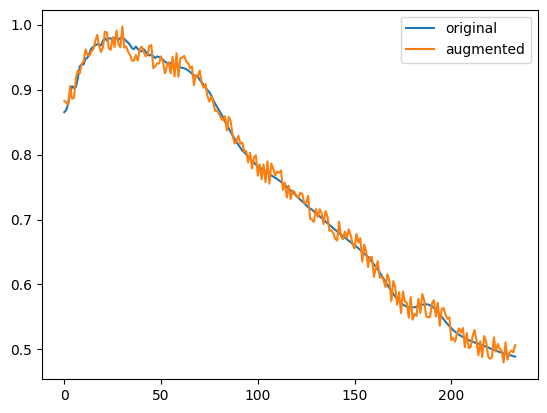

[0.72180435 0.7255412  0.72992823 0.74020322 0.75501108 0.76992513
 0.77215956 0.76993707 0.7986856  0.80254291] [0.73276259 0.72309633 0.74427215 0.74809794 0.73877818 0.78895003
 0.78260515 0.78137964 0.78381014 0.80055835]
[0.8652115  0.86832758 0.8778901  0.89377494 0.90516847 0.90261434
 0.90387794 0.91711138 0.93558824 0.93859199] [0.87616974 0.86588271 0.89223401 0.90166966 0.88893556 0.92163923
 0.91432353 0.92855396 0.92071279 0.93660743]


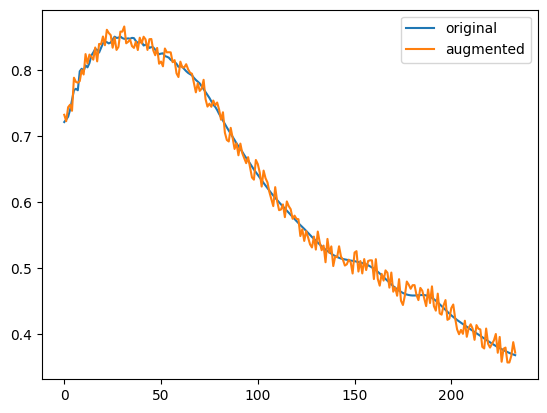

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import operator
import pinard.augmentation as aug
import matplotlib.pyplot as plt


# def augment(X, apply_on="samples"):
#     x = np.arange(0, len(X[0]), 1)
#     t, c, k = interpolate.splrep(x, X[0], s=0, k=3)
#     delta_x_size = int(np.around(len(t) / 20))
#     delta_x = np.linspace(np.min(x), np.max(x), delta_x_size)
#     delta_y = np.random.uniform(-10, 10, delta_x_size)
#     delta = np.interp(t, delta_x, delta_y)
#     t = t + delta
#     spline = interpolate.BSpline(t, c, k, extrapolate=True)

#     return spline(X)


def split_data():
    split_data = np.loadtxt("data/test_augmentation.csv", delimiter=";")
    y = np.reshape(split_data[:, 0], (-1, 1))
    x = split_data[:, 1:]
    return (x, y)

seed = 42
augmenters = [
    (0, "Rotate_Translate", aug.Rotate_Translate, {"random_state":seed}),
    (1, "Rotate_Translate_custom", aug.Rotate_Translate,{"random_state": seed, "p_range": 5, "y_factor": 5}),
    (2, "Random_X_Operation", aug.Random_X_Operation, {"random_state": seed}),
    (3, "Random_X_Operation_custom", aug.Random_X_Operation, {"random_state": seed, "operator_func": operator.add, "operator_range": (-0.02, 0.02)}),
    # (4, "Spline_Smoothing", aug.Spline_Smoothing, {"random_state": seed}),
    # (5, "Spline_Smoothing", aug.Spline_Smoothing, {"random_state": seed, "smoothing_factor": 3}),
    
    # (4, "Random_X_Spline_Deformation", aug.Random_X_Spline_Deformation, {"random_state": seed}),
]

X, Y = split_data()

for index, name, augmenter, params in augmenters:
    print(name)
    aug_instance = augmenter(**params)
    augmented_X = aug_instance.augment(X, apply_on="samples")
    print(X[0, :10], augmented_X[0, :10])
    print(X[1, :10], augmented_X[1, :10])

    plt.plot(X[1], label="original")
    plt.plot(augmented_X[1], label="augmented")
    plt.legend()
    plt.show()


    aug_instance = augmenter(**params)
    augmented_X = aug_instance.augment(X, apply_on="global")
    print(X[0, :10], augmented_X[0, :10])
    print(X[1, :10], augmented_X[1, :10])

    plt.plot(X[0], label="original")
    plt.plot(augmented_X[0], label="augmented")
    plt.legend()
    plt.show()

    print("\n")


In [211]:
import numpy as np

# Example NumPy array
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Calculate the mean of each column (2nd dimension)
column_means = np.mean(arr, axis=0)

print(column_means)

[4. 5. 6.]
